# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('labor.csv')
df.head(10)

,Time.Month,Time.Month Name,Time.Year,Data.Civilian Noninstitutional Population.Asian,Data.Civilian Noninstitutional Population.Black or African American,Data.Civilian Noninstitutional Population.White,Data.Not In Labor Force.Asian,Data.Not In Labor Force.Black or African American,Data.Not In Labor Force.White,Data.Civilian Labor Force.Asian.Counts,Data.Civilian Labor Force.Asian.Participation Rate,Data.Employed.Asian.Counts,Data.Employed.Asian.Unemployment Rate,Data.Unemployed.Asian.Counts,Data.Unemployed.Asian.Unemployment Rate,Data.Civilian Labor Force.Black or African American.Counts.All,Data.Civilian Labor Force.Black or African American.Counts.Men,Data.Civilian Labor Force.Black or African American.Counts.Women,Data.Civilian Labor Force.Black or African American.Participation Rate.All,Data.Civilian Labor Force.Black or African American.Participation Rate.Men,Data.Civilian Labor Force.Black or African American.Participation Rate.Women,Data.Civilian Labor Force.White.Counts.All,Data.Civilian Labor Force.White.Counts.Men,Data.Civilian Labor Force.White.Counts.Women,Data.Civilian Labor Force.White.Participation Rate.All,Data.Civilian Labor Force.White.Participation Rate.Men,Data.Civilian Labor Force.White.Participation Rate.Women,Data.Employed.Black or African American.Counts.All,Data.Employed.Black or African American.Counts.Men,Data.Employed.Black or African American.Counts.Women,Data.Employed.Black or African American.Employment-Population Ratio.All,Data.Employed.Black or African American.Employment-Population Ratio.Men,Data.Employed.Black or African American.Employment-Population Ratio.Women,Data.Employed.White.Counts.All,Data.Employed.White.Counts.Men,Data.Employed.White.Counts.Women,Data.Employed.White.Employment-Population Ratio.All,Data.Employed.White.Employment-Population Ratio.Men,Data.Employed.White.Employment-Population Ratio.Women,Data.Unemployed.Black or African American.Counts.All,Data.Unemployed.Black or African American.Counts.Men,Data.Unemployed.Black or African American.Counts.Women,Data.Unemployed.Black or African American.Unemployment Rate.All,Data.Unemployed.Black or African American.Unemployment Rate.Men,Data.Unemployed.Black or African American.Unemployment Rate.Women,Data.Unemployed.White.Counts.All,Data.Unemployed.White.Counts.Men,Data.Unemployed.White.Counts.Women,Data.Unemployed.White.Unemployment Rate.All,Data.Unemployed.White.Unemployment Rate.Men,Data.Unemployed.White.Unemployment Rate.Women
0,1,January,1972,0.0,14332.0,126749.0,0.0,5998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,4180.0,3498.0,58.1,76.2,50.9,75608.0,43514.0,25728.0,59.7,81.7,42.7,7367.0,3802.0,3156.0,51.4,69.3,45.9,71169.0,41418.0,24403.0,56.1,77.7,40.5,967.0,378.0,343.0,11.6,9.0,9.8,4439.0,2096.0,1325.0,5.9,4.8,5.1
1,2,February,1972,0.0,14381.0,126976.0,0.0,5943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8438.0,4271.0,3499.0,58.7,77.7,50.7,75710.0,43502.0,25788.0,59.6,81.5,42.7,7465.0,3894.0,3188.0,51.9,70.8,46.2,71310.0,41441.0,24517.0,56.2,77.6,40.6,973.0,377.0,311.0,11.5,8.8,8.9,4400.0,2062.0,1271.0,5.8,4.7,4.9
2,3,March,1972,0.0,14401.0,127191.0,0.0,5857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8544.0,4323.0,3533.0,59.3,78.5,51.2,76262.0,43812.0,25953.0,60.0,81.9,42.9,7626.0,3974.0,3204.0,53.0,72.1,46.4,72006.0,41849.0,24688.0,56.6,78.2,40.8,918.0,349.0,329.0,10.7,8.1,9.3,4256.0,1963.0,1265.0,5.6,4.5,4.9
3,4,April,1972,0.0,14434.0,127372.0,0.0,5952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8483.0,4330.0,3496.0,58.8,78.3,50.6,76256.0,43821.0,25816.0,59.9,81.7,42.7,7704.0,4032.0,3236.0,53.4,72.9,46.8,72378.0,42085.0,24589.0,56.8,78.5,40.6,779.0,298.0,260.0,9.2,6.9,7.4,3878.0,1736.0,1227.0,5.1,4.0,4.8
4,5,May,1972,0.0,14486.0,127601.0,0.0,5914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8572.0,4364.0,3542.0,59.2,78.7,51.2,76421.0,43843.0,25889.0,59.9,81.6,42.7,7775.0,4063.0,3245.0,53.7,73.3,46.9,72898.0,42319.0,24647.0,57.1,78.8,40.7,797.0,302.0,297.0,9.3,6.9,8.4,3523.0,1525.0,1242.0,4.6,3.5,4.8
5,6,June,1972,0.0,14513.0,127831.0,0.0,5481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9031.0,4436.

## Before anything, I'll make sure to get a basic look at the data and see what I may need to change or prepare it.

In [3]:
# shape
df.shape

(528, 51)

In [4]:
# check for nulls and check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 51 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Time.Month                                                                    528 non-null    int64  
 1   Time.Month Name                                                               528 non-null    object 
 2   Time.Year                                                                     528 non-null    int64  
 3   Data.Civilian Noninstitutional Population.Asian                               528 non-null    float64
 4   Data.Civilian Noninstitutional Population.Black or African American           528 non-null    float64
 5   Data.Civilian Noninstitutional Population.White                               528 non-null    float64
 6   Data.Not In Labor Force.Asian     

In [8]:
df.columns.isnull().sum()

0

## Takeaways
- 44 years worth of data (528 rows/ 12 months)
- no missing values in the dataframe
- definitely need to rename columns
- data is on a timescale, so create a complete column with Month and year then set as index

In [5]:
df = df.rename(columns = {
                          'Time.Month':'month_num', 
                          'Time.Month Name':'month', 
                          'Time.Year':'year',
                          'Data.Civilian Noninstitutional Population.Asian':'asian_american_cnp',
                          'Data.Civilian Noninstitutional Population.Black or African American':'african_american_cnp', 
                          'Data.Civilian Noninstitutional Population.White':'white_cnp',
                          'Data.Not In Labor Force.Asian':'asian_not_in_labor_force',
                          'Data.Not In Labor Force.Black or African American':'african_american_not_in_labor_force',
                          'Data.Not In Labor Force.White':'white_not_in_labor_force', 
                          'Data.Civilian Labor Force.Asian.Counts':'asian_civilian_labor_force', 
                          'Data.Civilian Labor Force.Asian.Participation Rate':'asian_clf_rate',
                          'Data.Employed.Asian.Counts':'asian_employed', 
                          'Data.Employed.Asian.Unemployment Rate':'employed_asian_unemployment_rate', 
                          'Data.Unemployed.Asian.Counts':'asian_unemployed',
                          'Data.Unemployed.Asian.Unemployment Rate':'unemployed_asian_unemployment_rate', 
                          'Data.Civilian Labor Force.Black or African American.Counts.All':'all_african_american_civilian_labor_force',
                          'Data.Civilian Labor Force.Black or African American.Counts.Men':'male_african_american_civilian_labor_force',
                          'Data.Civilian Labor Force.Black or African American.Counts.Women':'female_african_american_civilian_labor_force',
                          'Data.Civilian Labor Force.Black or African American.Participation Rate.All':'all_african_american_clf_rate', 
                          'Data.Civilian Labor Force.Black or African American.Participation Rate.Men':'male_african_american_clf_rate', 
                          'Data.Civilian Labor Force.Black or African American.Participation Rate.Women':'female_african_american_clf_rate',
                          'Data.Civilian Labor Force.White.Counts.All':'all_white_civilian_labor_force', 
                          'Data.Civilian Labor Force.White.Counts.Men':'male_white_civilian_labor_force', 
                          'Data.Civilian Labor Force.White.Counts.Women':'female_white_civilian_labor_force',
                          'Data.Civilian Labor Force.White.Participation Rate.All':'all_white_clf_rate', 
                          'Data.Civilian Labor Force.White.Participation Rate.Men':'male_white_clf_rate',
                          'Data.Civilian Labor Force.White.Participation Rate.Women':'female_white_clf_rate',
                          'Data.Employed.Black or African American.Counts.All':'all_african_american_employed',
                          'Data.Employed.Black or African American.Counts.Men':'male_african_american_employed', 
                          'Data.Employed.Black or African American.Counts.Women':'female_african_american_employed', 
                          'Data.Employed.Black or African American.Employment-Population Ratio.All':'all_african_american_employment_ratio',
                          'Data.Employed.Black or African American.Employment-Population Ratio.Men':'male_african_american_employment_ratio', 
                          'Data.Employed.Black or African American.Employment-Population Ratio.Women':'female_african_american_employment_ratio', 
                          'Data.Employed.White.Counts.All':'all_white_employed',
                          'Data.Employed.White.Counts.Men':'male_white_employed', 
                          'Data.Employed.White.Counts.Women':'female_white_employed',
                          'Data.Employed.White.Employment-Population Ratio.All':'employed_all_white_employment_ratio',
                          'Data.Employed.White.Employment-Population Ratio.Men':'employed_male_white_employment_ratio',
                          'Data.Employed.White.Employment-Population Ratio.Women':'employed_female_white_employment_ratio', 
                          'Data.Unemployed.Black or African American.Counts.All':'all_african_american_unemployed', 
                          'Data.Unemployed.Black or African American.Counts.Men':'male_african_american_unemployed',
                          'Data.Unemployed.Black or African American.Counts.Women':'female_african_american_unemployed', 
                          'Data.Unemployed.Black or African American.Unemployment Rate.All':'all_african_american_unemployment_rate', 
                          'Data.Unemployed.Black or African American.Unemployment Rate.Men':'male_african_american_unemployment_rate',
                          'Data.Unemployed.Black or African American.Unemployment Rate.Women':'female_african_american_unemployment_rate', 
                          'Data.Unemployed.White.Counts.All':'all_white_unemployed',
                          'Data.Unemployed.White.Counts.Men':'male_white_unemployed',
                          'Data.Unemployed.White.Counts.Women':'female_white_unemployed',
                          'Data.Unemployed.White.Unemployment Rate.All':'all_white_unemployment_rate', 
                          'Data.Unemployed.White.Unemployment Rate.Men':'male_white_unemployment_rate', 
                          'Data.Unemployed.White.Unemployment Rate.Women':'female_white_unemployment_rate'})

In [7]:
df.head()

,month_num,month,year,asian_american_cnp,african_american_cnp,white_cnp,asian_not_in_labor_force,african_american_not_in_labor_force,white_not_in_labor_force,asian_civilian_labor_force,asian_clf_rate,asian_employed,employed_asian_unemployment_rate,asian_unemployed,unemployed_asian_unemployment_rate,all_african_american_civilian_labor_force,male_african_american_civilian_labor_force,female_african_american_civilian_labor_force,all_african_american_clf_rate,male_african_american_clf_rate,female_african_american_clf_rate,all_white_civilian_labor_force,male_white_civilian_labor_force,female_white_civilian_labor_force,all_white_clf_rate,male_white_clf_rate,female_white_clf_rate,all_african_american_employed,male_african_american_employed,female_african_american_employed,all_african_american_employment_ratio,male_african_american_employment_ratio,female_african_american_employment_ratio,all_white_employed,male_white_employed,female_white_employed,employed_all_white_employment_ratio,employed_male_white_employment_ratio,employed_female_white_employment_ratio,all_african_american_unemployed,male_african_american_unemployed,female_african_american_unemployed,all_african_american_unemployment_rate,male_african_american_unemployment_rate,female_african_american_unemployment_rate,all_white_unemployed,male_white_unemployed,female_white_unemployed,all_white_unemployment_rate,male_white_unemployment_rate,female_white_unemployment_rate
0,1,January,1972,0.0,14332.0,126749.0,0.0,5998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,4180.0,3498.0,58.1,76.2,50.9,75608.0,43514.0,25728.0,59.7,81.7,42.7,7367.0,3802.0,3156.0,51.4,69.3,45.9,71169.0,41418.0,24403.0,56.1,77.7,40.5,967.0,378.0,343.0,11.6,9.0,9.8,4439.0,2096.0,1325.0,5.9,4.8,5.1
1,2,February,1972,0.0,14381.0,126976.0,0.0,5943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8438.0,4271.0,3499.0,58.7,77.7,50.7,75710.0,43502.0,25788.0,59.6,81.5,42.7,7465.0,3894.0,3188.0,51.9,70.8,46.2,71310.0,41441.0,24517.0,56.2,77.6,40.6,973.0,377.0,311.0,11.5,8.8,8.9,4400.0,2062.0,1271.0,5.8,4.7,4.9
2,3,March,1972,0.0,14401.0,127191.0,0.0,5857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8544.0,4323.0,3533.0,59.3,78.5,51.2,76262.0,43812.0,25953.0,60.0,81.9,42.9,7626.0,3974.0,3204.0,53.0,72.1,46.4,72006.0,41849.0,24688.0,56.6,78.2,40.8,918.0,349.0,329.0,10.7,8.1,9.3,4256.0,1963.0,1265.0,5.6,4.5,4.9
3,4,April,1972,0.0,14434.0,127372.0,0.0,5952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8483.0,4330.0,3496.0,58.8,78.3,50.6,76256.0,43821.0,25816.0,59.9,81.7,42.7,7704.0,4032.0,3236.0,53.4,72.9,46.8,72378.0,42085.0,24589.0,56.8,78.5,40.6,779.0,298.0,260.0,9.2,6.9,7.4,3878.0,1736.0,1227.0,5.1,4.0,4.8
4,5,May,1972,0.0,14486.0,127601.0,0.0,5914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8572.0,4364.0,3542.0,59.2,78.7,51.2,76421.0,43843.0,25889.0,59.9,81.6,42.7,7775.0,4063.0,3245.0,53.7,73.3,46.9,72898.0,42319.0,24647.0,57.1,78.8,40.7,797.0,302.0,297.0,9.3,6.9,8.4,3523.0,1525.0,1242.0,4.6,3.5,4.8


In [17]:
# concat year and month
df['date'] = df['month'].astype(str).str.cat(df['year'].astype(str), sep=', ')

In [18]:
df.head()

,month_num,month,year,asian_american_cnp,african_american_cnp,white_cnp,asian_not_in_labor_force,african_american_not_in_labor_force,white_not_in_labor_force,asian_civilian_labor_force,asian_clf_rate,asian_employed,employed_asian_unemployment_rate,asian_unemployed,unemployed_asian_unemployment_rate,all_african_american_civilian_labor_force,male_african_american_civilian_labor_force,female_african_american_civilian_labor_force,all_african_american_clf_rate,male_african_american_clf_rate,female_african_american_clf_rate,all_white_civilian_labor_force,male_white_civilian_labor_force,female_white_civilian_labor_force,all_white_clf_rate,male_white_clf_rate,female_white_clf_rate,all_african_american_employed,male_african_american_employed,female_african_american_employed,all_african_american_employment_ratio,male_african_american_employment_ratio,female_african_american_employment_ratio,all_white_employed,male_white_employed,female_white_employed,employed_all_white_employment_ratio,employed_male_white_employment_ratio,employed_female_white_employment_ratio,all_african_american_unemployed,male_african_american_unemployed,female_african_american_unemployed,all_african_american_unemployment_rate,male_african_american_unemployment_rate,female_african_american_unemployment_rate,all_white_unemployed,male_white_unemployed,female_white_unemployed,all_white_unemployment_rate,male_white_unemployment_rate,female_white_unemployment_rate,date
0,1,January,1972,0.0,14332.0,126749.0,0.0,5998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,4180.0,3498.0,58.1,76.2,50.9,75608.0,43514.0,25728.0,59.7,81.7,42.7,7367.0,3802.0,3156.0,51.4,69.3,45.9,71169.0,41418.0,24403.0,56.1,77.7,40.5,967.0,378.0,343.0,11.6,9.0,9.8,4439.0,2096.0,1325.0,5.9,4.8,5.1,"January, 1972"
1,2,February,1972,0.0,14381.0,126976.0,0.0,5943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8438.0,4271.0,3499.0,58.7,77.7,50.7,75710.0,43502.0,25788.0,59.6,81.5,42.7,7465.0,3894.0,3188.0,51.9,70.8,46.2,71310.0,41441.0,24517.0,56.2,77.6,40.6,973.0,377.0,311.0,11.5,8.8,8.9,4400.0,2062.0,1271.0,5.8,4.7,4.9,"February, 1972"
2,3,March,1972,0.0,14401.0,127191.0,0.0,5857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8544.0,4323.0,3533.0,59.3,78.5,51.2,76262.0,43812.0,25953.0,60.0,81.9,42.9,7626.0,3974.0,3204.0,53.0,72.1,46.4,72006.0,41849.0,24688.0,56.6,78.2,40.8,918.0,349.0,329.0,10.7,8.1,9.3,4256.0,1963.0,1265.0,5.6,4.5,4.9,"March, 1972"
3,4,April,1972,0.0,14434.0,127372.0,0.0,5952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8483.0,4330.0,3496.0,58.8,78.3,50.6,76256.0,43821.0,25816.0,59.9,81.7,42.7,7704.0,4032.0,3236.0,53.4,72.9,46.8,72378.0,42085.0,24589.0,56.8,78.5,40.6,779.0,298.0,260.0,9.2,6.9,7.4,3878.0,1736.0,1227.0,5.1,4.0,4.8,"April, 1972"
4,5,May,1972,0.0,14486.0,127601.0,0.0,5914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8572.0,4364.0,3542.0,59.2,78.7,51.2,76421.0,43843.0,25889.0,59.9,81.6,42.7,7775.0,4063.0,3245.0,53.7,73.3,46.9,72898.0,42319.0,24647.0,57.1,78.8,40.7,797.0,302.0,297.0,9.3,6.9,8.4,3523.0,1525.0,1242.0,4.6,3.5,4.8,"May, 1972"


In [19]:
df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date').sort_index()

df.head()

,month_num,month,year,asian_american_cnp,african_american_cnp,white_cnp,asian_not_in_labor_force,african_american_not_in_labor_force,white_not_in_labor_force,asian_civilian_labor_force,asian_clf_rate,asian_employed,employed_asian_unemployment_rate,asian_unemployed,unemployed_asian_unemployment_rate,all_african_american_civilian_labor_force,male_african_american_civilian_labor_force,female_african_american_civilian_labor_force,all_african_american_clf_rate,male_african_american_clf_rate,female_african_american_clf_rate,all_white_civilian_labor_force,male_white_civilian_labor_force,female_white_civilian_labor_force,all_white_clf_rate,male_white_clf_rate,female_white_clf_rate,all_african_american_employed,male_african_american_employed,female_african_american_employed,all_african_american_employment_ratio,male_african_american_employment_ratio,female_african_american_employment_ratio,all_white_employed,male_white_employed,female_white_employed,employed_all_white_employment_ratio,employed_male_white_employment_ratio,employed_female_white_employment_ratio,all_african_american_unemployed,male_african_american_unemployed,female_african_american_unemployed,all_african_american_unemployment_rate,male_african_american_unemployment_rate,female_african_american_unemployment_rate,all_white_unemployed,male_white_unemployed,female_white_unemployed,all_white_unemployment_rate,male_white_unemployment_rate,female_white_unemployment_rate
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1972-01-01,1,January,1972,0.0,14332.0,126749.0,0.0,5998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,4180.0,3498.0,58.1,76.2,50.9,75608.0,43514.0,25728.0,59.7,81.7,42.7,7367.0,3802.0,3156.0,51.4,69.3,45.9,71169.0,41418.0,24403.0,56.1,77.7,40.5,967.0,378.0,343.0,11.6,9.0,9.8,4439.0,2096.0,1325.0,5.9,4.8,5.1
1972-02-01,2,February,1972,0.0,14381.0,126976.0,0.0,5943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8438.0,4271.0,3499.0,58.7,77.7,50.7,75710.0,43502.0,25788.0,59.6,81.5,42.7,7465.0,3894.0,3188.0,51.9,70.8,46.2,71310.0,41441.0,24517.0,56.2,77.6,40.6,973.0,377.0,311.0,11.5,8.8,8.9,4400.0,2062.0,1271.0,5.8,4.7,4.9
1972-03-01,3,March,1972,0.0,14401.0,127191.0,0.0,5857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8544.0,4323.0,3533.0,59.3,78.5,51.2,76262.0,43812.0,25953.0,60.0,81.9,42.9,7626.0,3974.0,3204.0,53.0,72.1,46.4,72006.0,41849.0,24688.0,56.6,78.2,40.8,918.0,349.0,329.0,10.7,8.1,9.3,4256.0,1963.0,1265.0,5.6,4.5,4.9
1972-04-01,4,April,1972,0.0,14434.0,127372.0,0.0,5952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8483.0,4330.0,3496.0,58.8,78.3,50.6,76256.0,43821.0,25816.0,59.9,81.7,42.7,7704.0,4032.0,3236.0,53.4,72.9,46.8,72378.0,42085.0,24589.0,56.8,78.5,40.6,779.0,298.0,260.0,9.2,6.9,7.4,3878.0,1736.0,1227.0,5.1,4.0,4.8
1972-05-01,5,May,1972,0.0,14486.0,127601.0,0.0,5914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8572.0,4364.0,3542.0,59.2,78.7,51.2,76421.0,43843.0,25889.0,59.9,81.6,42.7,7775.0,4063.0,3245.0,53.7,73.3,46.9,72898.0,42319.0,24647.0,57.1,78.8,40.7,797.0,302.0,297.0,9.3,6.9,8.4,3523.0,1525.0,1242.0,4.6,3.5,4.8


## Now that the index is set I can do some univariate exploration

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528 entries, 1972-01-01 to 2015-12-01
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   month_num                                     528 non-null    int64  
 1   month                                         528 non-null    object 
 2   year                                          528 non-null    int64  
 3   asian_american_cnp                            528 non-null    float64
 4   african_american_cnp                          528 non-null    float64
 5   white_cnp                                     528 non-null    float64
 6   asian_not_in_labor_force                      528 non-null    float64
 7   african_american_not_in_labor_force           528 non-null    float64
 8   white_not_in_labor_force                      528 non-null    float64
 9   asian_civilian_labor_force                    

In [21]:
df.describe()

,month_num,year,asian_american_cnp,african_american_cnp,white_cnp,asian_not_in_labor_force,african_american_not_in_labor_force,white_not_in_labor_force,asian_civilian_labor_force,asian_clf_rate,asian_employed,employed_asian_unemployment_rate,asian_unemployed,unemployed_asian_unemployment_rate,all_african_american_civilian_labor_force,male_african_american_civilian_labor_force,female_african_american_civilian_labor_force,all_african_american_clf_rate,male_african_american_clf_rate,female_african_american_clf_rate,all_white_civilian_labor_force,male_white_civilian_labor_force,female_white_civilian_labor_force,all_white_clf_rate,male_white_clf_rate,female_white_clf_rate,all_african_american_employed,male_african_american_employed,female_african_american_employed,all_african_american_employment_ratio,male_african_american_employment_ratio,female_african_american_employment_ratio,all_white_employed,male_white_employed,female_white_employed,employed_all_white_employment_ratio,employed_male_white_employment_ratio,employed_female_white_employment_ratio,all_african_american_unemployed,male_african_american_unemployed,female_african_american_unemployed,all_african_american_unemployment_rate,male_african_american_unemployment_rate,female_african_american_unemployment_rate,all_white_unemployed,male_white_unemployed,female_white_unemployed,all_white_unemployment_rate,male_white_unemployment_rate,female_white_unemployment_rate
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.500000,1993.500000,4016.005682,22682.028409,165566.744318,1388.494318,8425.698864,52396.435606,2627.511364,23.857955,2495.214015,1.824621,132.293561,1.824621,14256.530303,6533.551136,6887.287879,62.676136,73.030114,60.030682,108015.664773,56835.234848,44587.840909,65.118939,77.569129,55.595644,12543.272727,5812.924242,6190.681818,55.041288,65.016856,53.857386,101949.827652,53996.005682,42384.422348,61.452083,73.725947,52.831818,1713.270833,720.630682,696.653409,12.220833,10.995644,10.360606,6065.842803,2839.206439,2203.380682,5.645455,4.969886,5.021023
std,3.455326,12.710467,5407.070844,4727.625196,20046.445778,1888.727647,1687.803216,18513.076464,3522.920138,31.603855,3345.537885,2.581087,189.486110,2.581087,3118.948831,1257.866056,1894.026327,2.054578,2.921552,4.377236,14659.848951,6638.996961,8966.168044,2.043173,2.384416,5.295467,2896.122534,1128.947459,1765.409804,3.056396,3.834528,4.778806,14138.386480,6262.748700,8671.850953,2.424174,2.872144,5.328821,466.698710,260.224363,209.692010,2.901302,3.214472,2.431763,1739.138658,1065.045677,642.704943,1.469855,1.653833,1.256585
min,1.000000,1972.000000,0.000000,14332.000000,126749.000000,0.000000,5447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8334.000000,4180.000000,3489.000000,57.600000,65.600000,50.100000,75608.000000,43502.000000,25296.000000,59.400000,71.500000,41.600000,7367.000000,3802.000000,3156.000000,47.800000,55.800000,44.200000,71169.000000,41418.000000,23933.000000,55.600000,66.500000,39.400000,745.000000,224.000000,258.000000,6.500000,4.900000,4.800000,3015.000000,1007.000000,999.000000,3.100000,2.200000,2.700000
25%,3.750000,1982.750000,0.000000,18761.000000,150110.750000,0.000000,7194.250000,52888.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11459.500000,5452.000000,5253.250000,61.200000,71.300000,56.600000,96564.500000,51311.750000,37689.250000,63.700000,76.400000,52.275000,9508.750000,4618.500000,4399.500000,52.800000,63.400000,49.375000,89248.250000,4815

Column: month_num


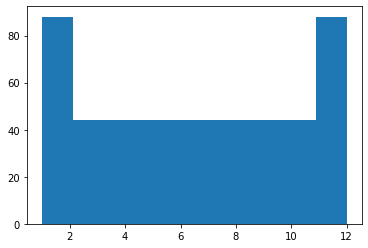

Column: month


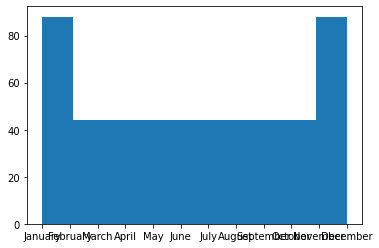

Column: year


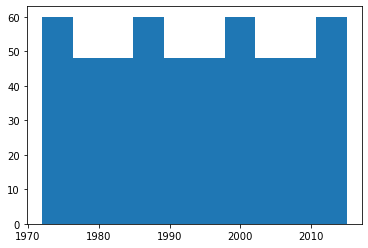

Column: asian_american_cnp


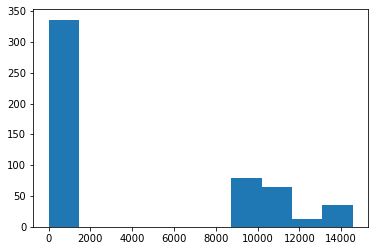

Column: african_american_cnp


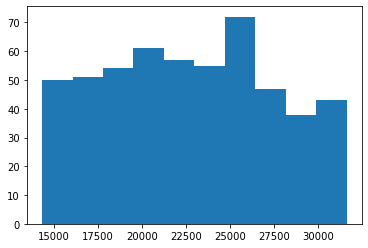

Column: white_cnp


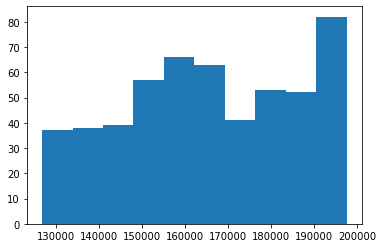

Column: asian_not_in_labor_force


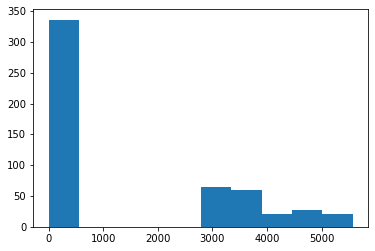

Column: african_american_not_in_labor_force


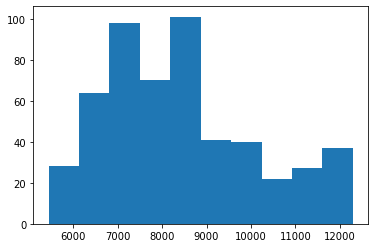

Column: white_not_in_labor_force


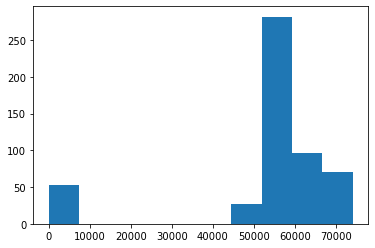

Column: asian_civilian_labor_force


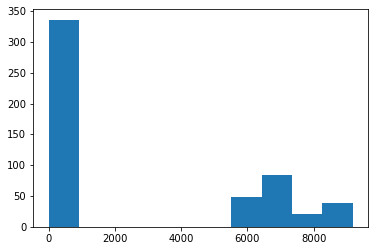

Column: asian_clf_rate


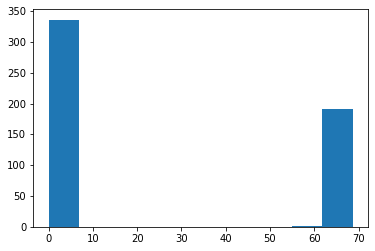

Column: asian_employed


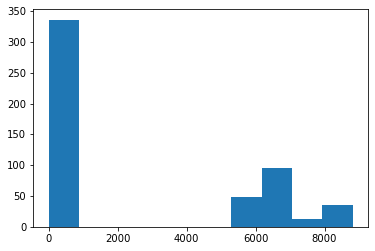

Column: employed_asian_unemployment_rate


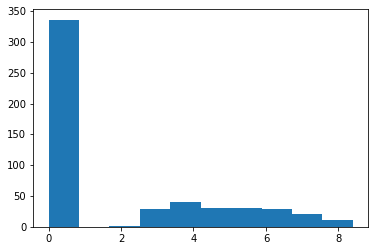

Column: asian_unemployed


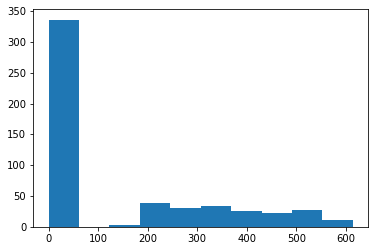

Column: unemployed_asian_unemployment_rate


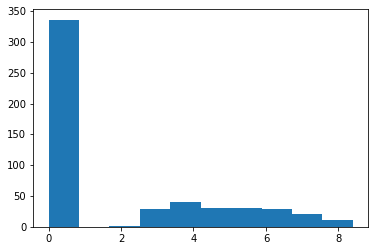

Column: all_african_american_civilian_labor_force


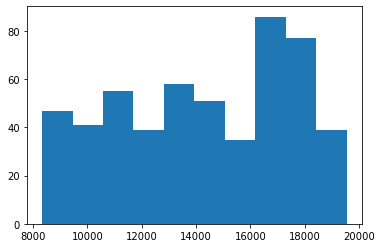

Column: male_african_american_civilian_labor_force


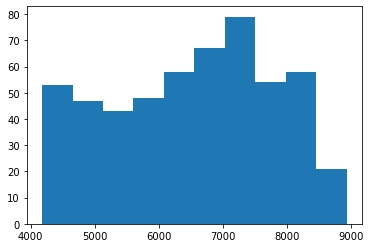

Column: female_african_american_civilian_labor_force


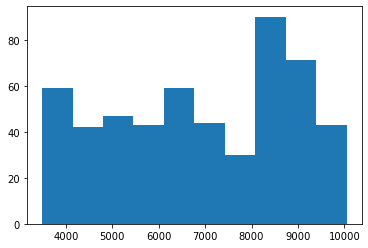

Column: all_african_american_clf_rate


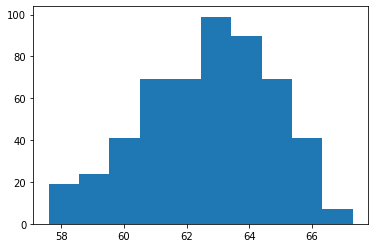

Column: male_african_american_clf_rate


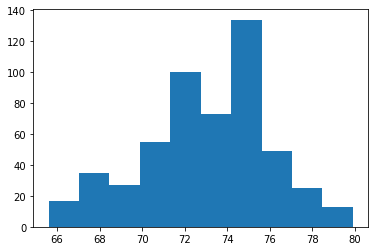

Column: female_african_american_clf_rate


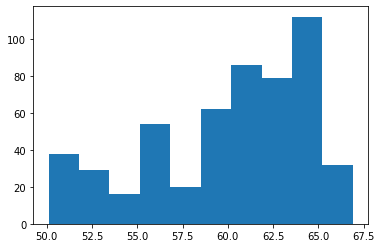

Column: all_white_civilian_labor_force


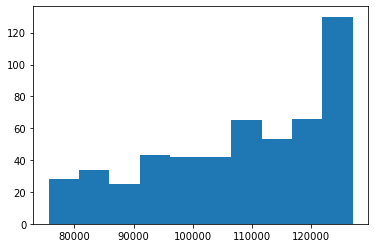

Column: male_white_civilian_labor_force


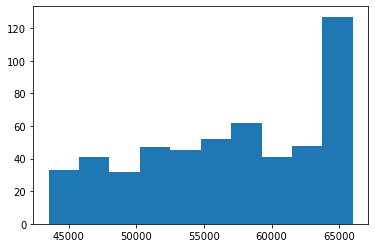

Column: female_white_civilian_labor_force


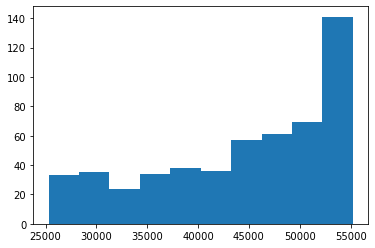

Column: all_white_clf_rate


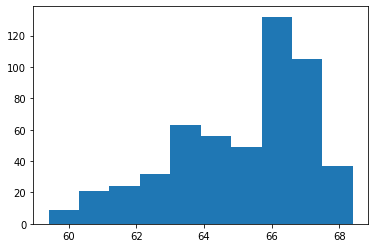

Column: male_white_clf_rate


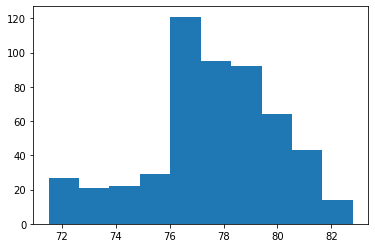

Column: female_white_clf_rate


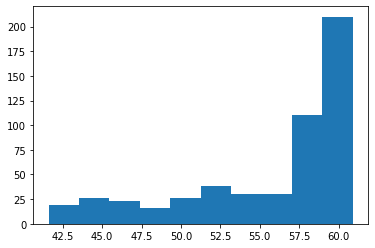

Column: all_african_american_employed


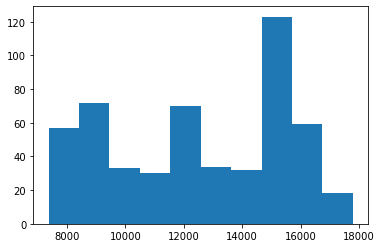

Column: male_african_american_employed


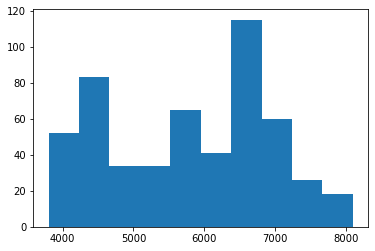

Column: female_african_american_employed


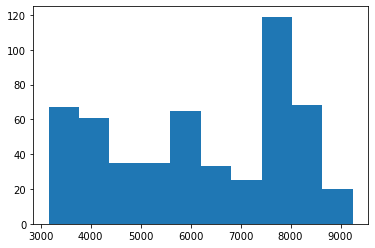

Column: all_african_american_employment_ratio


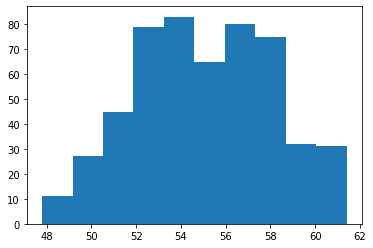

Column: male_african_american_employment_ratio


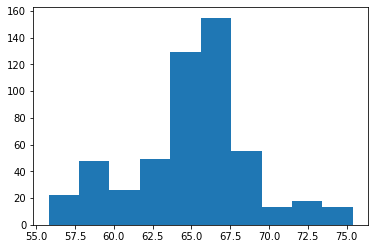

Column: female_african_american_employment_ratio


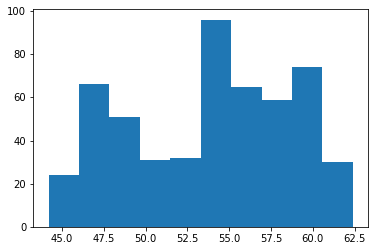

Column: all_white_employed


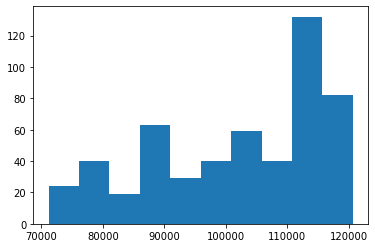

Column: male_white_employed


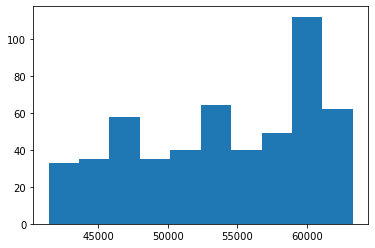

Column: female_white_employed


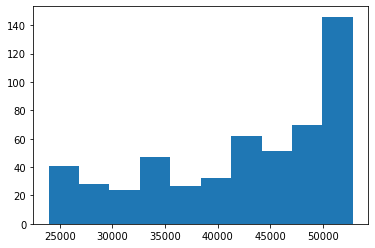

Column: employed_all_white_employment_ratio


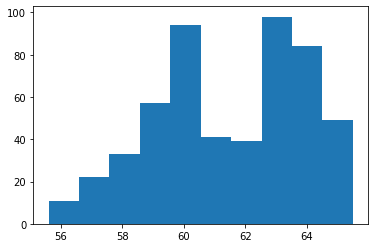

Column: employed_male_white_employment_ratio


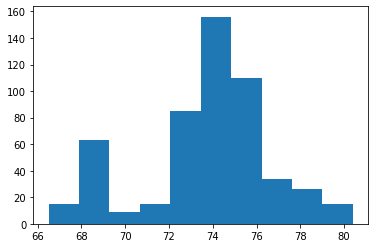

Column: employed_female_white_employment_ratio


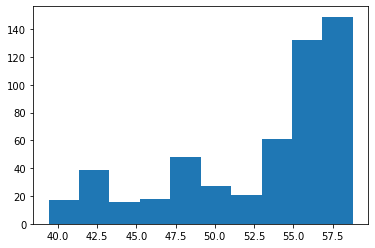

Column: all_african_american_unemployed


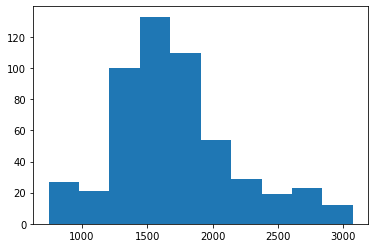

Column: male_african_american_unemployed


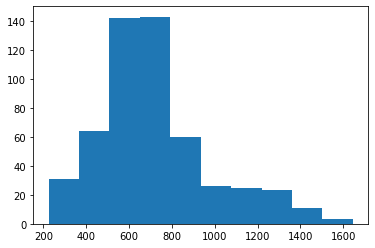

Column: female_african_american_unemployed


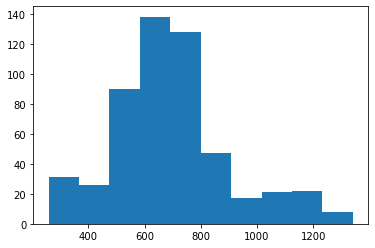

Column: all_african_american_unemployment_rate


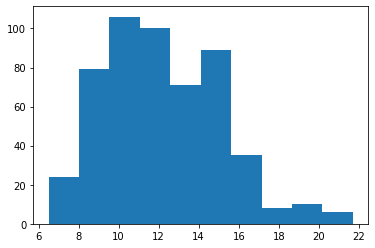

Column: male_african_american_unemployment_rate


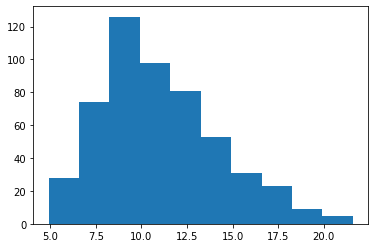

Column: female_african_american_unemployment_rate


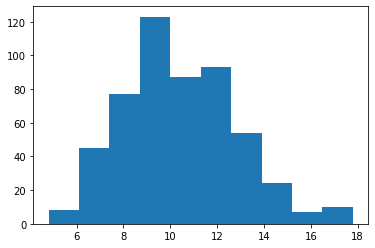

Column: all_white_unemployed


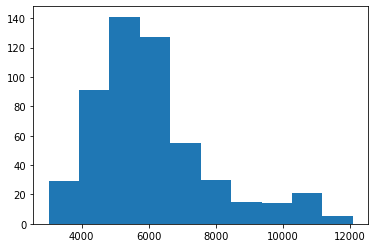

Column: male_white_unemployed


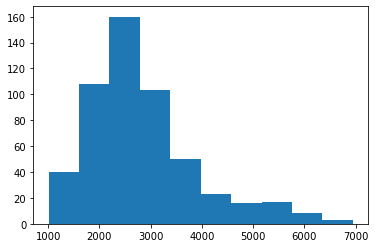

Column: female_white_unemployed


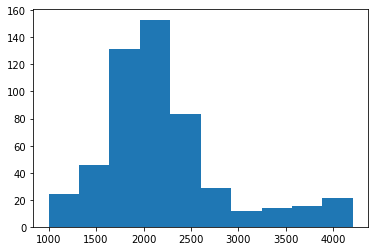

Column: all_white_unemployment_rate


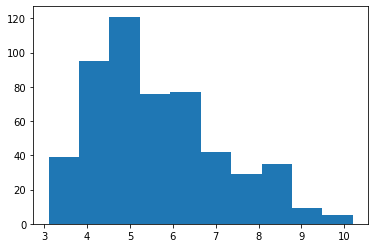

Column: male_white_unemployment_rate


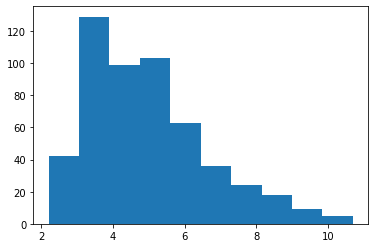

Column: female_white_unemployment_rate


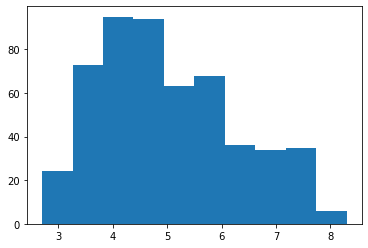

In [22]:
for col in df.columns:
    print('Column: ' + col)
    plt.hist(df[col])
    plt.show()

In [ ]:

df.groupby(['date'])